# Random Forest

In [0]:
#imports
FILENAME="BlackFriday.csv"
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [52]:
uploaded = files.upload()

Saving BlackFriday.csv to BlackFriday (3).csv


In [3]:
if not FILENAME in uploaded:
  print('o ficheiro {0} nao foi encontrado'.format(FILENAME))
  exit()
  
rawdata=uploaded['BlackFriday.csv'].decode('utf-8')
  
df=pd.read_csv(io.StringIO(rawdata))
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Preparar os dados

In [0]:
df.fillna(value=0,inplace=True)

In [0]:
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

In [0]:
df.drop(columns = ["User_ID","Product_ID"],inplace=True)
df.drop(columns = ["Occupation"],inplace=True)

In [0]:
#Anos a viver na cidade:
#4+ -> 4
df['Stay_In_Current_City_Years'].replace(['4+'],[4],inplace=True)

In [8]:
df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,A,2,0,3,0,0,8370
1,F,0-17,A,2,0,1,6,14,15200
2,F,0-17,A,2,0,12,0,0,1422
3,F,0-17,A,2,0,12,14,0,1057
4,M,55+,C,4,0,8,0,0,7969


### Encoding categorical data

In [0]:
df = pd.get_dummies(df, columns=['Gender','Age','City_Category'], drop_first=True)

In [10]:
df.head()

,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,2,0,3,0,0,8370,0,0,0,0,0,0,0,0,0
1,2,0,1,6,14,15200,0,0,0,0,0,0,0,0,0
2,2,0,12,0,0,1422,0,0,0,0,0,0,0,0,0
3,2,0,12,14,0,1057,0,0,0,0,0,0,0,0,0
4,4,0,8,0,0,7969,1,0,0,0,0,0,1,0,1


In [53]:
# Descriptive statistics for each column
df.describe()

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
count,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.408797,5.295546,6.784907,3.871773,9333.859853,0.754087,0.181619,0.399366,0.199969,0.082827,0.069977,0.038884,0.421322,0.309623
std,0.491612,3.750701,6.211618,6.265963,4981.022133,0.430627,0.385530,0.489769,0.399977,0.275621,0.255108,0.193318,0.493771,0.462338
min,0.000000,1.000000,0.000000,0.000000,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,5866.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,5.000000,0.000000,8062.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,14.000000,8.000000,12073.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,18.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Criar variaveis y e X para a random forest

In [0]:
y = np.log(df['Purchase'])
X = df.drop('Purchase', axis=1)

### Separar os dados para trian e test set

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [56]:
#visualizar o tamanho de cada set
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430061, 14)
(107516, 14)
(430061,)
(107516,)


### Random Forest Regression

In [0]:
#criar objecto de random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None)

In [58]:
#demora um pouco a correr
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
#score das variaveis de teste
regressor.score(X_test, Y_test)

0.6563152669326935

In [60]:
#fazer previsões
y_pred = regressor.predict(X_test)
y_pred

array([9.49546024, 8.8250205 , 8.58866909, ..., 8.72594754, 9.55752801,
       8.59629719])

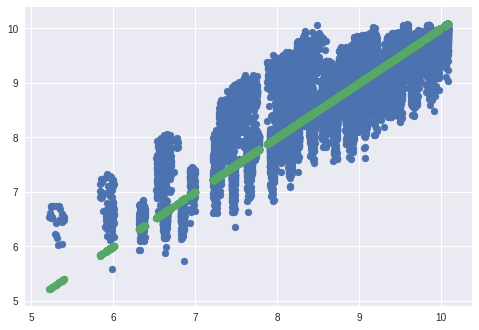

In [61]:
plt.scatter(x=Y_test, y=y_pred) #azul
plt.scatter(x=Y_test,y=Y_test) #verde
plt.show()
#verifica-se que os dados da previsão estão espalhados ao longo da linha das variaveis de teste

In [62]:
#calcular o RMSE para o train set

(np.mean((Y_train-regressor.predict(X_train)) ** 2))**0.5

#Esta é a importante - erro do método
np.mean(abs(Y_test-y_pred)/Y_test)

0.03237665731030634

In [63]:
from sklearn import metrics
display('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_pred, Y_test))))

'RMSE: 0.37881382286049153'

In [0]:
# Calcular o erro absoluto
errors = abs(y_pred - Y_test)

In [65]:
#mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.28


In [0]:
#  mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

In [67]:
# Calcular e display da accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.76 %.


### Só as features das categorias de produto

In [0]:
y2 = np.log(df['Purchase'])


In [0]:
feature_cols=['Product_Category_1','Product_Category_2','Product_Category_3']

In [0]:
X2=df[feature_cols]

In [0]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test=train_test_split(X2, y2, test_size=0.2, random_state=5)

In [72]:
#visualizar o tamanho de cada set
print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(430061, 3)
(107516, 3)
(430061,)
(107516,)


In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None)

In [74]:
#demora um pouco a correr
regressor2.fit(X2_train, Y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
regressor2.score(X2_test, Y2_test)

0.6660180174690535

In [76]:
y_pred2 = regressor2.predict(X2_test)
y_pred2

array([9.5073702 , 8.89403593, 8.68384297, ..., 8.60990569, 9.55218242,
       8.64778292])

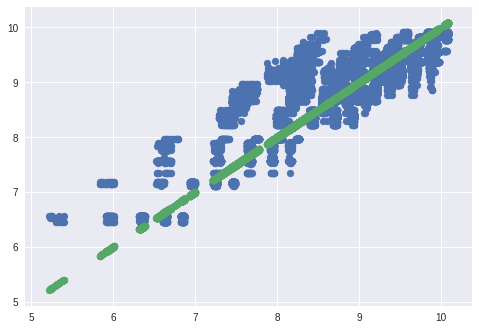

In [77]:
plt.scatter(x=Y2_test, y=y_pred2) #azul
plt.scatter(x=Y2_test,y=Y2_test) #verde
plt.show()
#o gráfico comporta-se de maneira semelhante ao anterior.

In [78]:
#calcular o RMSE para o train set

(np.mean((Y2_train-regressor2.predict(X2_train)) ** 2))**0.5

#Esta é a importante
np.mean(abs(Y2_test-y_pred2)/Y2_test)

0.03221500977276723

In [79]:
from sklearn import metrics
display('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_pred2, Y2_test))))

'RMSE: 0.3734282907771136'

In [0]:
# Calculate the absolute errors
errors = abs(y_pred2 - Y2_test)

In [81]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.28


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y2_test)

In [83]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.78 %.


### Learning Curves

In [0]:
from sklearn.model_selection import learning_curve
import numpy as np
from matplotlib import pyplot as plt

In [85]:
train_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestRegressor(), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_median_absolute_error')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0, 0.5)

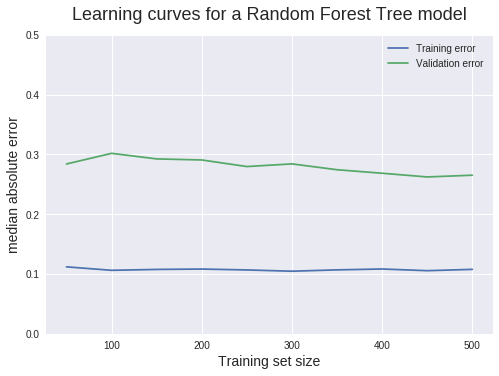

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

#os erros de train e validação são constantes à medida do crescimento do train set. Apesar disso o erro de validação é +/- 0.2 décimas acima do erro de train

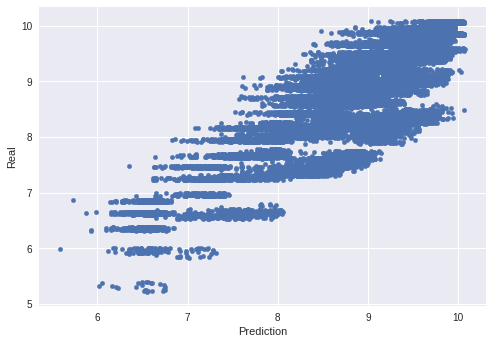

In [88]:
Values = pd.DataFrame({'Prediction':y_pred, 'Real':Y_test})
Values = Values.sort_values(['Prediction'], ascending=[True])
Values.plot('Prediction', 'Real', kind='scatter')

Text(0.5, 1.0, 'Prices vs Predicted Prices')

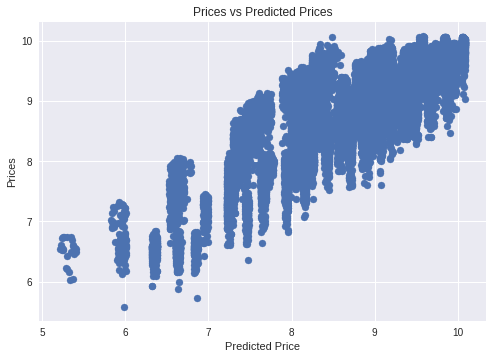

In [89]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Predicted Price")
plt.ylabel("Prices")
plt.title("Prices vs Predicted Prices")

Nestes dois últimos gráficos verifica-se que os dados estão espalhados à volta do eixo x=y, o que significa que neste método os dados estão a adaptar-se melhor.

# Conclusão - Qual é o melhor algoritmo?

O que nos dizem os resultados de ambos os métodos:

Linear Regression:
- RMSE = 0.5991;
- Accuracy = 94.96%.

Usando só as features de Product_Category_1, Product_Category_2 e Product_Category_3:
- RMSE = 0.6008;
- Accuracy = 94.94%.

Random Forest:
- RMSE = 0.3788;
- Accuracy = 96.76%.

Usando só as features de Product_Category_1, Product_Category_2 e Product_Category_3:
- RMSE = 0.3734;
- Accuracy = 96.78%.

Podemos concluir que o melhor algoritmo para este data set e para o nosso target é o **Random Forest**.

Na regressão linear quando se usa só as features de categoria de produto o erro não aumenta muito, portanto para melhores resultados temos de usar todas as features do dataset.
Na random forest quado se usa só as features de categoria de produto o erro diminuiu um pouco. Deste modo para melhorarmos os resultados temos de usar as features de categoria de produto, apesar de a variância de erro ser muito baixa.

Comparando os dois métodos verificamos que o RMSE da regressão linear é maior que a de random forest e a accuracy da random forest é maior que a da regressão linear (96%>94%).

Comparando os gráficos de ambos os métodos verificamos que os dados nos gráficos da regressão linear estão mais espalhados, apesar de tentarem ter um comportamento semelhande ao eixo x=y. Nos gráficos da random forest os dados estão muito próximos do eixo x=y, comportando-se como uma linha.

Podemos concluir que este dataset tem muitos dados para trabalharmos, o que dificultou de alguma maneira o seu processamento e regressão. Felizmente conseguimos uma accuracy de >95% em ambos os métodos.

*Finito*


